# Home Credit Default Risk
### Can you predict how capable each applicant is of repaying a loan?

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [1]:
# Import some libraries needed for data analysis
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Set random seed
SEED = 42

# Pretty display for notebooks
%matplotlib inline

# Load the Application Train dataset
application_train = pd.read_csv("data/application_train.csv")

# Display the first record
display(application_train.head(n=1))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [2]:
# Split the data into features and target label
target = application_train['TARGET']
features = application_train.drop('TARGET', axis = 1)

In [3]:
# Create new columns from flags
features['OWN_CAR'] = features['FLAG_OWN_CAR'].apply(lambda x: 1 if x == 'Y' else 0)
features['OWN_REALTY'] = features['FLAG_OWN_REALTY'].apply(lambda x: 1 if x == 'Y' else 0)

In [4]:
# One-hot encode some categorical features using pandas.get_dummies()
dummy_cols = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

# Create dummy
dummy = pd.get_dummies(features[dummy_cols])

# Concat dummy
features_final = pd.concat([features, dummy], axis=1)

# drop original columns
features_final.drop(dummy_cols, axis=1, inplace=True)

In [5]:
# Drop remaining columns that will not be used for benchmark model
drop_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
            'NAME_TYPE_SUITE', 'NAME_FAMILY_STATUS', 'DAYS_BIRTH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
             'FLAG_WORK_PHONE','FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
            'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
             'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
             'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
             'EXT_SOURCE_3', 'APARTMENTS_AVG','BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
             'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
             'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
             'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
             'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
             'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 
             'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 
             'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 
             'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 
             'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 
             'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
             'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE',
             'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
             'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
             'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
             'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
             'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR' ,'AMT_REQ_CREDIT_BUREAU_DAY',
             'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 
             'AMT_REQ_CREDIT_BUREAU_YEAR']

features_final.drop(drop_cols, axis=1, inplace=True)

In [6]:
# Replace infinite values with nan
features_final = features_final.replace([np.inf, -np.inf], np.nan)

In [7]:
# Replace some missing values with median
features_final['AMT_ANNUITY'].fillna((features_final['AMT_ANNUITY'].median()), inplace=True)
features_final['AMT_GOODS_PRICE'].fillna((features_final['AMT_GOODS_PRICE'].median()), inplace=True)

In [8]:
# Check if any columns have missing values
features_final.columns[features_final.isnull().any()].tolist()

[]

In [9]:
# Display the first record again
display(features_final.head(n=1))

,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,REGION_RATING_CLIENT,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the features and target data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, target, test_size=0.2, random_state=SEED)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 246008 samples.
Testing set has 61503 samples.


In [11]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Create classifier
dt_clf = DecisionTreeClassifier(max_depth=10, max_features='sqrt', random_state=SEED)

# Fit model
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

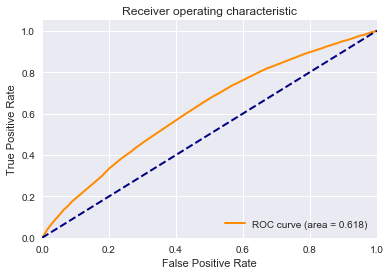

In [12]:
import visuals as vs
import seaborn as sns
# Set Seaborn color codes
sns.set(color_codes=True)

# Make predictions with class probabilities
y_scores = dt_clf.predict_proba(X_test)

vs.plot_roc_auc_curve(y_test, y_scores[:, 1])